In [ ]:
!pip install user_agent

  Preparing metadata (setup.py) ... done
  Created wheel for user_agent: filename=user_agent-0.1.10-py3-none-any.whl size=18966 sha256=f0eda233ddafa35641321d88cd0d557e42d68e804d42159a670bdd0b75fb23aa
  Stored in directory: /root/.cache/pip/wheels/69/29/26/1956a891a058037774285ee79ab5c3ecf034dba50a4198fedd
Successfully built user_agent


In [ ]:
import pandas as pd
import requests
import time
from bs4 import BeautifulSoup
from datetime import datetime
from user_agent import generate_user_agent

In [ ]:
def crawler(url):
    time.sleep(1)
    # 製作對網頁請求的假資料，如：假裝是IOS手機、Android手機、mac瀏覽器、desktop
    user_agent = generate_user_agent(device_type='desktop')
    # 代理 ip
    # proxies = {
    #   'http': '123.205.24.240:80',
    # }
    # headers
    headers={
        'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
        'accept-encoding': 'gzip, deflate, br',
        'accept-language': 'zh-TW,zh;q=0.9,en-US;q=0.8,en;q=0.7,',
        'sec-ch-ua': '"Google Chrome";v="111", "Not(A:Brand";v="8", "Chromium";v="111"',
        'sec-ch-ua-mobile': '?0',
        'sec-ch-ua-platform': 'macOS',
        'sec-fetch-dest': 'document',
        'sec-fetch-mode': 'navigate',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-user': '?1',
        'upgrade-insecure-requests': '1',
        'user-agent': user_agent,
    }
    #對指定的url連結做請求，並給予假資料
    r = requests.get(url, headers=headers, allow_redirects=False)
    r.encoding='utf-8'
    #將網頁作解析，以利找到所需資料
    soup = BeautifulSoup(r.text, 'html.parser')
    #回傳整個網頁的解析
    return soup

# Function to remove tags
def remove_tags(html):

    # parse html content
    soup = BeautifulSoup(html, 'html.parser')
    div = soup.find('div', class_ = 'post')
    for data in div(['blockquote']):
        # Remove tags
        data.decompose()

    # return data by retrieving the tag content
    return " ".join(div.stripped_strings)

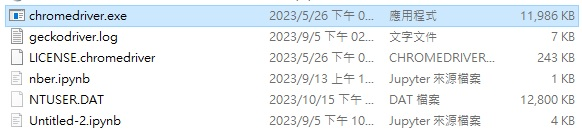
```
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager

def crawler(url):
    time.sleep(1)
    driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
    driver.get(url)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    return soup
```

In [ ]:
url, topic, latest_page, nposts, nviews, votes, n_pos, n_neg = [], [], [], [], [], [], [], []
time_str, url_latest_str ,latest_post_id= [], [], []

for a in range(2):
  if a == 0:
    url_main = 'https://www.econjobrumors.com/'
  else:
    url_main = f'https://www.econjobrumors.com/page/{a+1}'
  soup_main = crawler(url_main)
  tr = soup_main.find('table', id = 'latest').find_all('tr')

  for b in tr[1:]:
    for_url = b.find('a').attrs['href']
    url.append(for_url)

    for_topic = b.find_all('a')[0].text
    topic.append(for_topic)

    for_latest_page = b.select_one('a.page-numbers:last-of-type')
    if for_latest_page != None:
      latest_page.append(for_latest_page.text)
    else:
      latest_page.append('1')

    for_nposts = b.find_all('td', class_ = 'num')[0].text
    nposts.append(for_nposts)

    for_nviews = b.find_all('td', class_ = 'num')[1].text
    nviews.append(for_nviews)

    for_votes = b.find_all('td', class_ = 'num')[2].text
    votes.append(for_votes)
    for_votes = for_votes.split('-')
    n_pos.append(for_votes[0])
    n_neg.append(for_votes[1])

    for_time_str = b.find_all('td', class_ = 'num')[3].text
    time_str.append(for_time_str)

    for_url_latest_str = b.find_all('td', class_ = 'num')[3].find('a').attrs['href']
    url_latest_str.append(for_url_latest_str)

    for_latest_post_id = for_url_latest_str.rsplit('-', 1)[1]
    latest_post_id.append(for_latest_post_id)

In [ ]:
download_time, title_id1, post1, first_post_time, raw_cat, post_miss, poster_name, poster_id = [], [], [], [], [], [], [], []

for c in range(len(url)):
  for_download_time = datetime.now()
  download_time.append(for_download_time.strftime('%c'))
  title_id1.append(c+1)
  post1.append(1)
  raw_cat.append(topic[c])
  poster_name.append('')
  poster_id.append('')

  if topic[c] != []:
    post_miss.append(0)
  else:
    post_miss.append(1)

  #Scraping first post
  if int(nposts[c]) > 20:
    soup_first = crawler(url[c])
    threadpost_first = soup_first.find_all('div', class_ = 'threadpost')
    title_id1.append(c+1)
    post1.append(2)
    if threadpost_first != []:
      for_first_post = remove_tags(f'{threadpost_first}')
      raw_cat.append(for_first_post)
      post_miss.append(0)
      for_poster = soup_first.find('div', class_ = 'threadauthor')
      poster_name.append(for_poster.find('strong').text)
      poster_id.append(for_poster.find('small').text)
    else:
      raw_cat.append('YH0')
      post_miss.append(1)
      poster_name.append('None')
      poster_id.append('None')

  #--------------------------------------------------------------

  #Scraping last page
  soup_latest = crawler(url_latest_str[c])
  threadpost_latest = soup_latest.find_all('div', class_ = 'threadpost')
  topicmeta = soup_latest.find_all('ul', class_ = 'topicmeta')
  str_first_post_time = f'{topicmeta}'.split('\r\n\t\t\r\n\t')

  if threadpost_latest != []:
    first_post_time.append(str_first_post_time[1].split('-')[0])

    for d in range(len(threadpost_latest)):
      title_id1.append(c+1)

      if int(nposts[c]) > 20:
        post1.append(d+3)
      else:
        post1.append(d+2)

      for_raw_cat = remove_tags(f'{threadpost_latest[d]}')
      if for_raw_cat != '':
        raw_cat.append(for_raw_cat)
        post_miss.append(0)
      else:
        raw_cat.append('YH0')
        post_miss.append(1)

      for_poster = soup_latest.find('div', class_ = 'threadauthor')
      poster_name.append(for_poster.find('strong').text)
      poster_id.append(for_poster.find('small').text)

  else:
    first_post_time.append('None')
    title_id1.append(c+1)
    if int(nposts[c]) > 20:
      post1.append(3)
    else:
      post1.append(2)
    raw_cat.append('YH0')
    post_miss.append(1)
    poster_name.append('None')
    poster_id.append('None')

  print(c)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81


csv檔字串被""包住的關鍵是字串裡面有,

In [ ]:
main_stats_cleaned = pd.DataFrame({
    "url": url,
    "nposts": nposts,
    "nviews": nviews,
    "votes": votes,
    "topic": topic,
    "n_pos": n_pos,
    "n_neg": n_neg,
    "latest_page": latest_page,
    "latest_post_id": latest_post_id,
    "time_str": time_str})

main_stats_cleaned.to_csv('main_stats_cleaned.csv', index = False)

In [ ]:
EJR0_raw_text_cleaned = pd.DataFrame({
    "title_id1": title_id1,
    "post1": post1,
    "raw_cat": raw_cat,
    "post_miss": post_miss,
    "poster_name": poster_name,
    "poster_id": poster_id})

EJR0_raw_text_cleaned.to_csv('EJR0_raw_text_cleaned.csv', index = False)

---
以下都是測試用code

https://www.econjobrumors.com/topic/the-upshot-from-the-most-recent-iv-papers/page/2

In [ ]:
test_url = 'https://www.econjobrumors.com/topic/the-upshot-from-the-most-recent-iv-papers/page/2'
test_soup = crawler(test_url)
test_threadpost = test_soup.find_all('div', class_ = 'threadpost')
test_rawcat, test_postmiss =[], []
for z in test_threadpost:
  test_for_rawcat = remove_tags(f'{z}')
  if test_for_rawcat != '':
    test_rawcat.append(test_for_rawcat)
    test_postmiss.append(0)
  else:
    test_rawcat.append('YH0')
    test_postmiss.append(1)

In [ ]:
test_rawcat

['With a single instrument, if you have a t=3.16 --> t^2= F of 10.',
 'People still use IV? lol what a joke.',
 'Chamberlain 1987',
 'IV is still ok but you gotta really understand the difference between LATE and ATE',
 'Not sure where’s the news. A few years ago my dept tried to hire a guy who is famous for applying the rainfall instrument in a bunch of papers. I asked him to explain the conditions under which all of his specifications were simultaneously valid. He looked at me and he said “that’s not how you do research”.',
 'MB? You dodged a bullet there if so.',
 "F-stat of 10 is still fine, but you have to adjust your second-stage t-stats if the F-stat is less than ~100. That's the upshot. Lock thread.",
 "Except F stats weren't the main issue to begin with.",
 'lol',
 'Like how climate scientists explain rainfall based on economic activity, and economists use rainfall as an instrument for econ outcomes.',
 'Based on my experience, most applied economist can’t even run the F test 

In [ ]:
#檢查哪些post抓不到
for x in range(len(post_miss)):
  if post_miss[x] == 1:
    print(title_id1[x], post1[x])

In [ ]:
#不要刪，這些手動抓
for x in range(len(url)):
  test = url[x].find('%')
  if test != -1:
    print( x , url[x])

7 https://www.econjobrumors.com/topic/it%e2%80%99s-easy-if-you-try
8 https://www.econjobrumors.com/topic/china%e2%80%99s-trickle-down-economic-policy-really-destroyed-the-country
20 https://www.econjobrumors.com/topic/apple-to-overtake-samsung-as-the-world%e2%80%99s-largest-smartphone-brand
45 https://www.econjobrumors.com/topic/%e9%bb%91%e5%a4%8d%e6%97%a6lemon%e7%9a%84%e9%83%bd%e6%98%af%e4%bb%80%e4%b9%88%e4%ba%ba
58 https://www.econjobrumors.com/topic/stop-saying-%e2%80%9cmeat-based-plant%e2%80%9d
59 https://www.econjobrumors.com/topic/it%e2%80%99s-actually-not-thou-my-surprise-that-lennon-is-gay
62 https://www.econjobrumors.com/topic/what-%e4%bb%80%e4%b9%88%e6%98%aflow%e9%80%bc-%e4%bb%80%e4%b9%88%e6%9d%a5%e5%a4%b4


In [ ]:
url_test = 'https://web.archive.org/web/20230904160129/https://www.econjobrumors.com/topic/it%e2%80%99s-easy-if-you-try'
soup_test = crawler(url_test)
threadpost_first_test = soup_test.find_all('div', class_ = 'threadpost')
threadpost_first_test


In [ ]:
#保留起來，等到解決再刪掉
soup_test = crawler('https://www.econjobrumors.com/topic/how-dim-does-one-have-to-be-to-fall-for-%e2%80%9cburning-man%e2%80%9d')
threadpost_first_test = soup_test.find_all('div', class_ = 'threadpost')
if threadpost_first_test == []:
  print('None')
else:
  pass

In [ ]:
content, author = [], []
for y in range(len(title)):
  soup = crawler(title[y])
  stop = False
  number = 1
  while stop == False:
    try:
      div = soup.find('div', id = f'position-{number}')

      post_content = div.find('div', class_ = 'post').text
      content.append(post_content)

      post_author = div.find('div', class_ = 'threadauthor').text
      author.append(post_author)
    except:
      if div is None:
        stop = True
        break


In [ ]:
soup_test = crawler('https://www.econjobrumors.com/topic/request-a-thread-to-be-deleted-here')
posts =
content_test, author_test = [], []

while stop == False:
    div = soup_test.find('div', id = f'position-{number}')

    post_content = div.find('div', class_ = 'post').text
    content_test.append(post_content)

    post_author = div.find('div', class_ = 'threadauthor').text
    author_test.append(post_author)
    if div == '':
       stop = True
       break
    number += 1


AttributeError: ignored

In [ ]:
print(div)

In [ ]:

def author_and_post(number):
  div = soup.find('div', id = f'position-{number}')
  return div


In [ ]:
def get_article_info(url):
  soup = crawler(url)
  li = soup.find_all('div', class_= 'threadpost')
  content, p_time = [], []
  for i in li:
    post_content = i.find('div', class_ = 'post').text
    content.append(post_content)

    post_stuff = i.find('div', class_ = 'poststuff').text
    post_time = post_stuff.split('#')
    p_time.append(post_time[0])
  df = pd.DataFrame({
      'content' : content,
      'time' : p_time
  })
  return df

def get_author(url):
  soup = crawler(url)
  lj = soup.find_all('div', class_ = 'threadauthor')
  author = []
  for j in lj:
    post_author = j.find('small').text
    author.append(post_author)

  df = pd.DataFrame({'author': author })
  return df